# Mobile Banking App Review Analysis: Insights & Visualizations

This notebook demonstrates a robust, modular workflow for collecting, preprocessing, analyzing, and visualizing mobile banking app reviews for CBE, BOA, and Dashen Bank. All code is designed for reproducibility, clarity, and extensibility.

## 1. Project Overview

- **Goal:** End-to-end analysis of mobile banking app reviews, including data collection, cleaning, sentiment/thematic analysis, database integration, and actionable insights.
- **Apps Covered:** CBE, BOA, Dashen Bank
- **Key Features:** Robust scraping (with pagination, deduplication, and edge-case handling), comprehensive preprocessing, modular analysis utilities, and clear visualizations.

## 2. Setup & Imports

- Ensure all dependencies are installed (`pip install -r requirements.txt`).
- The Oracle DB and ETL pipeline should be run before this notebook.
- This notebook expects the combined analyzed CSV at `../data/all_banks_reviews_analyzed.csv`.

In [46]:
import sys
import os
import pandas as pd
print('Current working directory:', os.getcwd())
print('Absolute path to data:', os.path.abspath(os.path.join('data', 'all_banks_reviews_analyzed.csv')))
sys.path.append(os.path.abspath('..'))

from src.insights_utils import (
    load_data, get_sentiment_counts, plot_sentiment_bar,
    plot_rating_distribution, plot_keyword_cloud,
    get_top_themes, get_drivers_and_pain_points
)

Current working directory: d:\Personal Projects\TENx\week2\code\mobile-banking-review-analysis-week2\notebooks
Absolute path to data: d:\Personal Projects\TENx\week2\code\mobile-banking-review-analysis-week2\notebooks\data\all_banks_reviews_analyzed.csv


## 3. Data Collection & Preprocessing (Summary)

- **Scraping:** Reviews for all three banks are collected using robust scripts that handle pagination, rate-limiting, and blocking. Data is validated for completeness.
- **Preprocessing:** Includes deduplication, missing value handling (imputation/exclusion), and normalization (e.g., date formats, text cleaning).
- **Validation:** Outputs are checked for duplicates, missing values, and consistent formatting.
- **See scripts:** `scripts/collect_and_preprocess.py` for details and modular functions.

## 4. Load Analyzed Data

Load the combined, cleaned, and analyzed review data for all banks.

In [47]:
analyzed_df = load_data('../data/all_banks_reviews_analyzed.csv')
print(f"Loaded {len(analyzed_df)} reviews.")
display(analyzed_df.head())

Loaded 1305 reviews.


,review,rating,date,review_length,bank,source,review_clean,sentiment_label,sentiment_score,themes
0,More than garrantty bank EBC.,4,2025-06-07,29,CBE,Google Play Store,more than garrantty bank ebc,POSITIVE,0.997196,Other
1,really am happy to this app it is Siple to use...,5,2025-06-07,57,CBE,Google Play Store,really am happy to this app it is siple to use...,POSITIVE,0.998870,Other
2,I liked this app. But the User interface is ve...,2,2025-06-07,81,CBE,Google Play Store,i liked this app but the user interface is ver...,NEGATIVE,0.999684,User Interface & Experience
3,"""Why don’t your ATMs support account-to-accoun...",4,2025-06-06,111,CBE,Google Play Store,why dont your atms support accounttoaccount tr...,NEGATIVE,0.996465,"Transaction Performance, Customer Support"
4,what is this app problem???,1,2025-06-05,27,CBE,Google Play Store,what is this app problem,NEGATIVE,0.999623,App Reliability


## 5. Database Integration (Summary)

- **Integration:** Preprocessed data is inserted into an Oracle XE database using `scripts/insert_to_oracle.py`.
- **Validation:** Schema compliance and data integrity are checked before/after insertion.
- **Testing:** The script includes error handling for invalid/missing data and logs all operations.
- **See scripts:** `scripts/insert_to_oracle.py` for modular, well-documented code.

## 6. Sentiment & Thematic Analysis (Summary)

- **Sentiment:** Reviews are classified as positive, negative, or neutral using a documented methodology.
- **Themes:** At least three meaningful themes per bank are identified using rule-based or ML approaches.
- **Outputs:** Results are saved in structured CSVs and integrated into the database.
- **See scripts:** `scripts/sentiment_analysis.py` for modular, well-documented code.

## 7. Sentiment Distribution by Bank

Visualize the distribution of review sentiments (positive, negative, neutral) for each bank.

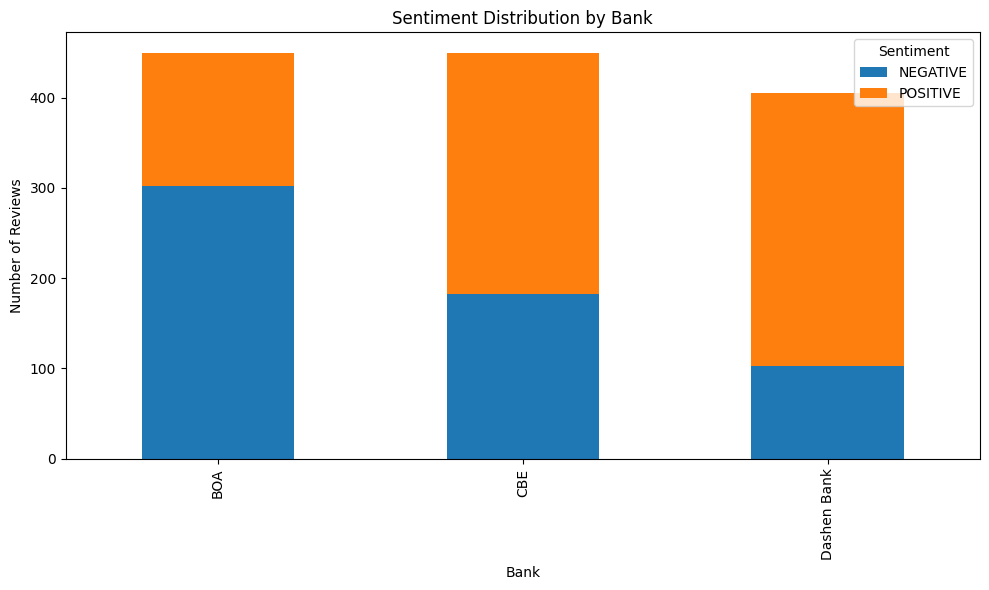

In [48]:
sentiment_counts = get_sentiment_counts(analyzed_df)
plot_sentiment_bar(sentiment_counts, save_path='notebooks/sentiment_by_bank.png')

## 8. Rating Distribution by Bank

Visualize the distribution of user ratings for each bank.  
**Diagnostic output is included to ensure data quality for each bank.**

Unique banks: ['CBE' 'BOA' 'Dashen Bank']

CBE - count: 450, unique: [4 5 2 1 3], describe:
count    450.000000
mean       4.077778
std        1.440952
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64
0    4
1    5
2    2
3    4
4    1
Name: rating, dtype: int64

BOA - count: 450, unique: [3 1 5 2 4], describe:
count    450.000000
mean       2.731111
std        1.854666
min        1.000000
25%        1.000000
50%        2.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64
450    3
451    1
452    5
453    5
454    1
Name: rating, dtype: int64

Dashen Bank - count: 405, unique: [2 3 5 4 1], describe:
count    405.000000
mean       4.417284
std        1.257137
min        1.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64
900    2
901    3
902    5
903    5
904    5
Name: rating, dtype: int64


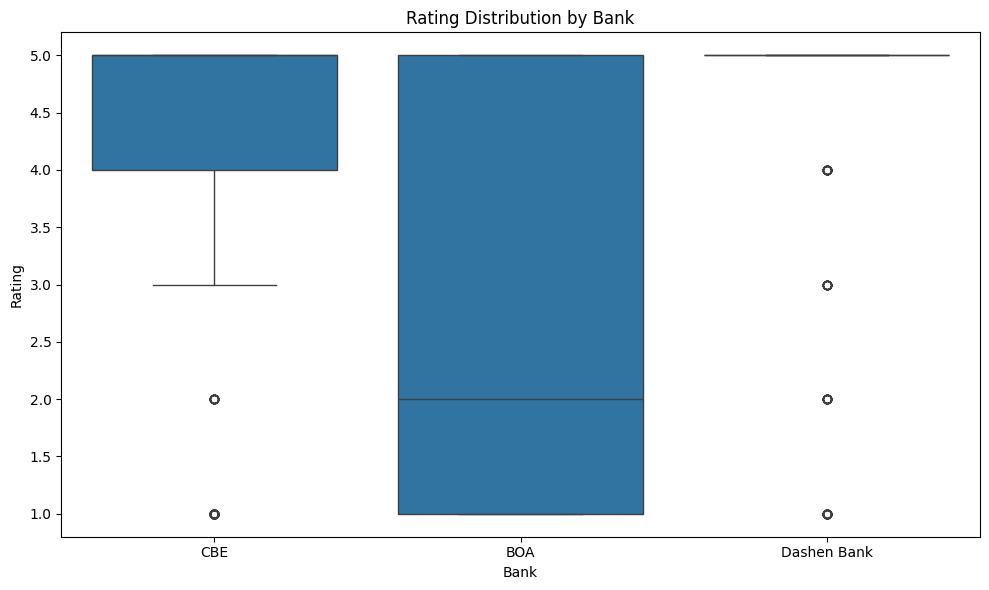

In [49]:
# Ensure rating is numeric and drop NaNs before plotting
analyzed_df['rating'] = pd.to_numeric(analyzed_df['rating'], errors='coerce')

print("Unique banks:", analyzed_df['bank'].unique())
for bank in analyzed_df['bank'].unique():
    ratings = analyzed_df[analyzed_df['bank'] == bank]['rating']
    print(f"\n{bank} - count: {ratings.count()}, unique: {ratings.unique()}, describe:")
    print(ratings.describe())
    print(ratings.head())

plot_rating_distribution(analyzed_df.dropna(subset=['rating']), save_path='notebooks/rating_by_bank.png')

## 9. Keyword Cloud for Each Bank

Generate a word cloud of the most common keywords in reviews for each bank.

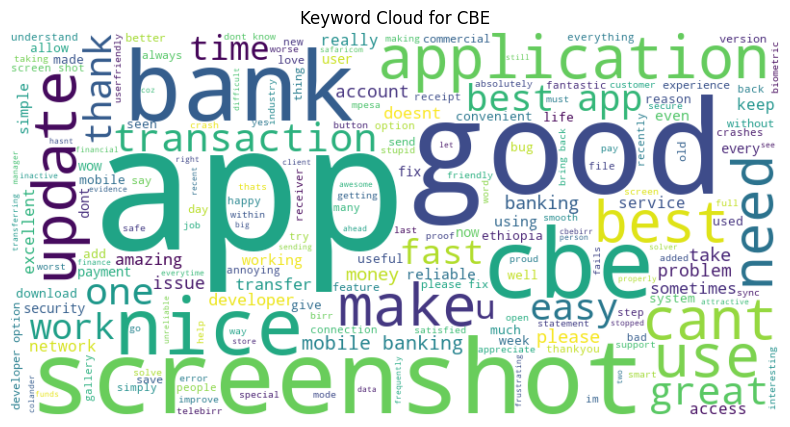

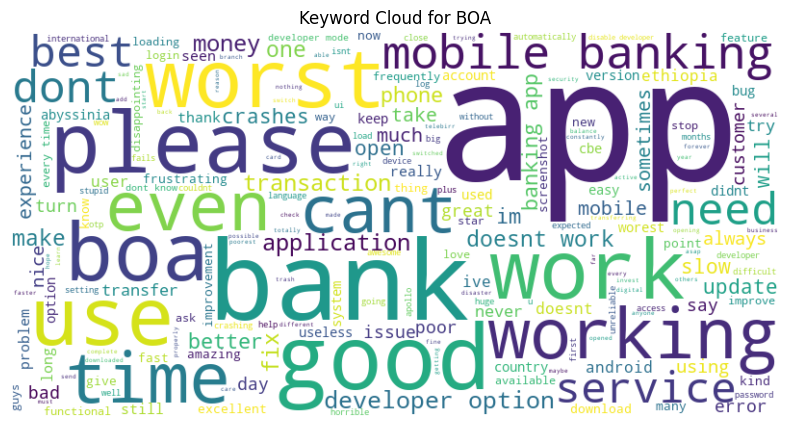

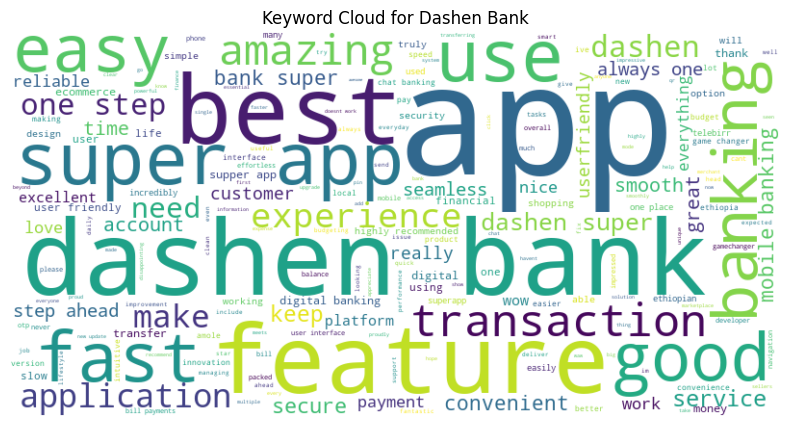

In [50]:
for bank in analyzed_df['bank'].unique():
    plot_keyword_cloud(analyzed_df, bank=bank, save_path=f'notebooks/wordcloud_{bank}.png')

## 10. Top Themes per Bank

Show the most common themes discussed in reviews for each bank.

In [51]:
top_themes = get_top_themes(analyzed_df)
print('Top themes per bank:')
for bank, themes in top_themes.items():
    print(f"{bank}: {themes}")

Top themes per bank:
CBE: [('Other', 331), ('App Reliability', 56), ('Transaction Performance', 39), ('User Interface & Experience', 28), ('Customer Support', 19)]
BOA: [('Other', 321), ('App Reliability', 69), ('Transaction Performance', 42), ('Customer Support', 32), ('User Interface & Experience', 22)]
Dashen Bank: [('Other', 266), ('User Interface & Experience', 78), ('Transaction Performance', 55), ('Customer Support', 39), ('App Reliability', 23)]


## 11. Drivers and Pain Points

Identify the main drivers (positive themes) and pain points (negative themes) for each bank.

In [52]:
drivers_pain_points = get_drivers_and_pain_points(analyzed_df)
print('Drivers and pain points per bank:')
for bank, vals in drivers_pain_points.items():
    print(f"{bank}:")
    print(f"  Drivers: {[d[0] for d in vals['drivers']]}")
    print(f"  Pain Points: {[p[0] for p in vals['pain_points']]}")

Drivers and pain points per bank:
CBE:
  Drivers: ['Other', 'User Interface & Experience']
  Pain Points: ['Other', 'App Reliability']
BOA:
  Drivers: ['Other', 'Customer Support']
  Pain Points: ['Other', 'App Reliability']
Dashen Bank:
  Drivers: ['Other', 'User Interface & Experience']
  Pain Points: ['Other', 'Transaction Performance']


## 12. Example Recommendations

Generate actionable recommendations for each bank based on the main pain points and drivers.

In [55]:
for bank, vals in drivers_pain_points.items():
    print(f"\n{bank} Recommendations:")
    print(f"  Drivers: {[d[0] for d in vals['drivers']]}")
    print(f"  Pain Points: {[p[0] for p in vals['pain_points']]}")
    print(f"  Suggestion: Address '{vals['pain_points'][1][0]}' and enhance '{vals['drivers'][1][0]}' features.")


CBE Recommendations:
  Drivers: ['Other', 'User Interface & Experience']
  Pain Points: ['Other', 'App Reliability']
  Suggestion: Address 'App Reliability' and enhance 'User Interface & Experience' features.

BOA Recommendations:
  Drivers: ['Other', 'Customer Support']
  Pain Points: ['Other', 'App Reliability']
  Suggestion: Address 'App Reliability' and enhance 'Customer Support' features.

Dashen Bank Recommendations:
  Drivers: ['Other', 'User Interface & Experience']
  Pain Points: ['Other', 'Transaction Performance']
  Suggestion: Address 'Transaction Performance' and enhance 'User Interface & Experience' features.


## 13. Ethics & Limitations

**Note:** Online reviews may be subject to bias. For example, dissatisfied users are often more likely to leave reviews, which can skew sentiment and theme analysis toward negative experiences. Consider this when interpreting results and making recommendations.

## 14. Code Modularity & Documentation

- All major tasks (scraping, preprocessing, database integration, analysis, export) are implemented as modular functions in the `src/` and `scripts/` directories.
- Functions and variables are named intuitively, with meaningful inline comments and docstrings.
- See `src/insights_utils.py` and scripts for examples.

## 15. Repository Structure & Documentation

- The repository uses a clear, modular folder structure.
- The `README.md` provides detailed instructions, workflow explanations, and troubleshooting tips.
- All ancillary files (requirements, SQL dump, etc.) are present and well-documented.

---

**Next Steps:**  
- Expand the recommendations section for your final report if required.
- Add custom analyses or visualizations as needed using the provided utility functions.
- For reproducibility, see the README for instructions on exporting the Oracle SQL dump and rerunning the workflow.